In [1]:
import os, sys

from LossJLearn.utils.plot import show_prediction_face_comparison, show_linear_point, show_regressor_linear
from LossJLearn.datasets import load_linear_data

import numpy as np
from matplotlib import pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, Normalizer
from sklearn.datasets import fetch_olivetti_faces, fetch_california_housing, load_diabetes
from sklearn.model_selection import train_test_split

print("python version: ", sys.version_info)
print(sklearn.__name__, sklearn.__version__)

python version:  sys.version_info(major=3, minor=7, micro=2, releaselevel='final', serial=0)
sklearn 0.23.2


## 1. 基础回归

### 1.1 线性回归

#### 1.1.1 sklearn.linear_model.LinearRegression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

In [2]:
X_data, y_data = load_linear_data(point_count=500, max_=10, w=3.2412, b=-5.2941, random_state=10834)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, random_state=19332)

rgs = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
rgs.fit(X_train, y_train)
rgs.coef_, rgs.intercept_

(array([3.22193235]), -5.178908572151361)

In [3]:
rgs.score(X_test, y_test)

0.987886225859275

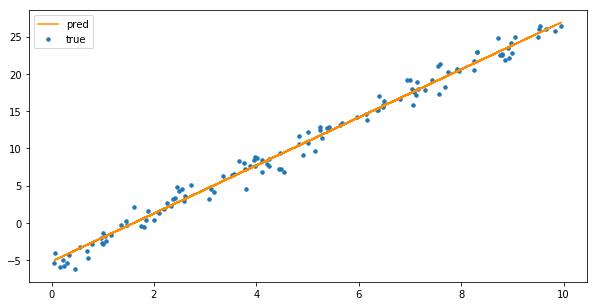

In [4]:
show_regressor_linear(X_test, y_test, rgs.coef_, rgs.intercept_)

##### 正规化Normalizer

每个样本求范数，再用每个特征除以范数

In [5]:
norm = Normalizer(norm="l2", copy=True)
X_train_norm = norm.fit_transform(X_train)
X_test_norm = norm.transform(X_test)

In [6]:
rgs = LinearRegression()
rgs.fit(X_train_norm, y_train)
rgs.coef_, rgs.intercept_

(array([0.]), 10.954228474432476)

In [7]:
rgs.score(X_test_norm, y_test)

-0.007907420757761408

In [8]:
X_train_norm[:10], X_test_norm[:10]

(array([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]]), array([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]]))

In [9]:
X_train[:5]

array([[8.51310884],
       [2.56333264],
       [6.69031165],
       [6.78072578],
       [7.17228023]])

In [10]:
rgs = LinearRegression(fit_intercept=True, 
                       normalize=True, # bool. fit_intercept为True才生效。 如果为True，则将在回归之前通过减去均值并除以12范数来对回归变量X进行归一化。
                       copy_X=False, 
                       n_jobs=None)
rgs.fit(X_train, y_train)
X_train[:5]

array([[ 0.06177273],
       [-0.04306255],
       [ 0.02965497],
       [ 0.03124807],
       [ 0.03814728]])

In [11]:
X_test[:5]

array([[2.72985206],
       [7.73380008],
       [3.07655716],
       [0.17534075],
       [6.34958458]])

In [12]:
rgs.score(X_test, y_test)

0.987886225859275

In [13]:
X_test[:5]

array([[2.72985206],
       [7.73380008],
       [3.07655716],
       [0.17534075],
       [6.34958458]])

In [14]:
rgs.coef_, rgs.intercept_

(array([3.22193235]), -5.178908572151364)

In [15]:
%%timeit
rgs = LinearRegression(n_jobs=2)
rgs.fit(X_train, y_train)

327 µs ± 20 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [16]:
%%timeit
rgs = LinearRegression(n_jobs=-1)
rgs.fit(X_train, y_train)

354 µs ± 66.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [17]:
%%timeit
rgs = LinearRegression(n_jobs=None)
rgs.fit(X_train, y_train)

376 µs ± 35.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


#### 1.1.2 sklearn.linear_model.SGDRegressor

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor

In [18]:
X_data, y_data = load_linear_data(point_count=500, max_=10, w=3.2412, b=-5.2941, random_state=10834)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, random_state=19332)

In [19]:
rgs = SGDRegressor(random_state=10190)
rgs.fit(X_train, y_train)
rgs.score(X_test, y_test)

0.9874157381106864

##### 标准化StandardScaler

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler

z = (x - u) / s, u是均值， s是标准差

In [20]:
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [21]:
scaler.mean_, scaler.scale_

(array([5.00728609]), array([2.93074174]))

In [22]:
rgs = SGDRegressor(
    loss='squared_loss', # ‘squared_loss’, ‘huber’, ‘epsilon_insensitive’, or ‘squared_epsilon_insensitive’
    penalty='l2', # 惩罚项（正则项）
    alpha=0.0001, # 正则系数
    fit_intercept=True, 
    max_iter=100,
    tol=0.001,
    shuffle=True,
    verbose=0,
    epsilon=0.1,
    random_state=10190, 
    learning_rate='invscaling', 
    eta0=0.01,
    power_t=0.25,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=5,
    warm_start=False,
    average=False
)
rgs.fit(X_train_scaler, y_train)
rgs.coef_, rgs.intercept_

(array([9.43581359]), array([10.94787748]))

In [23]:
rgs.score(X_test_scaler, y_test)

0.9878711884871213

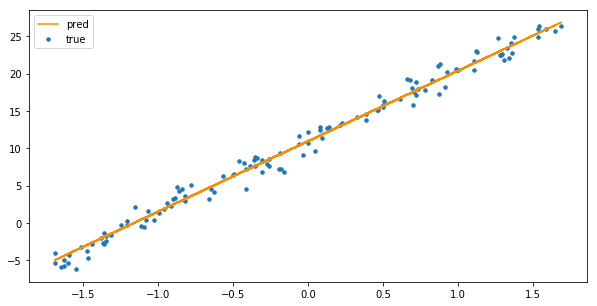

In [24]:
show_regressor_linear(X_test_scaler, y_test, pred_coef=rgs.coef_, pred_intercept=rgs.intercept_)

### 1.2 多项式回归

In [25]:
def load_data_from_func(func=lambda X_data: 0.1383 * np.square(X_data) - 1.2193 * X_data + 2.4096,
                        x_min=0, x_max=10, n_samples=500, loc=0, scale=1, random_state=None):
    if random_state is not None and isinstance(random_state, int):
        np.random.seed(random_state)
    x = np.random.uniform(x_min, x_max, n_samples)
    y = func(x)
    noise = np.random.normal(loc=loc, scale=scale, size=n_samples)
    y += noise
    return x.reshape([-1, 1]), y

X_data, y_data = load_data_from_func(n_samples=500, random_state=10392)

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures/

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, random_state=10319)
poly = PolynomialFeatures() # [1, a, b, a^2, ab, b^2]
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

X_train_poly.shape

(375, 3)

In [27]:
rgs = LinearRegression()
rgs.fit(X_train_poly, y_train)
rgs.score(X_test_poly, y_test)

0.5423800412888162

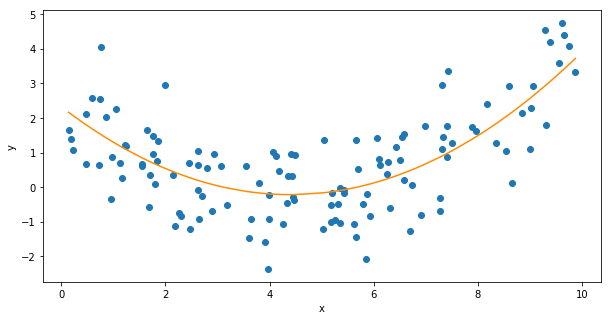

In [28]:
y_pred = rgs.predict(X_test_poly)

def show_regression_line(X_data, y_data, y_pred):
    plt.figure(figsize=[10, 5])
    plt.xlabel("x")
    plt.ylabel("y")
    if X_data.ndim == 2:
        X_data = X_data.reshape(-1)
    plt.scatter(X_data, y_data)
    idx = np.argsort(X_data)
    X_data = X_data[idx]
    y_pred = y_pred[idx]
    plt.plot(X_data, y_pred, color="darkorange")
    plt.show()
    
show_regression_line(X_test, y_test, y_pred)

## 2. 加利福尼亚房价数据集

In [29]:
df = fetch_california_housing(data_home="./data", as_frame=True)

In [30]:
X_data = df['data']

In [31]:
X_data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_data, df.target, random_state=1, shuffle=True)

### 2.1 线性回归

In [33]:
rgs = LinearRegression()
rgs.fit(X_train, y_train)

LinearRegression()

In [34]:
rgs.score(X_test, y_test)

0.5929869285760094

In [35]:
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)
rgs = LinearRegression()
rgs.fit(X_train_scaler, y_train)
rgs.score(X_test_scaler, y_test)

0.59298692857601

### 2.2 岭回归

https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression-and-classification  
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge  

In [36]:
rgs = Ridge(alpha=1.0, solver="auto")
rgs.fit(X_train, y_train)
rgs.score(X_test, y_test)

0.5929846671576572

In [37]:
rgs.coef_

array([ 4.40414555e-01,  9.66110278e-03, -1.04473532e-01,  6.25231108e-01,
       -4.61382991e-06, -3.37354852e-03, -4.24301365e-01, -4.39158870e-01])

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html#sklearn.linear_model.RidgeCV

#### 2.2.1 交叉验证

In [38]:
rgs = RidgeCV(
    alphas=(0.001, 0.01, 0.1, 1.0, 10.0),
    fit_intercept=True,
    normalize= False,
    scoring=None, # 如果为None，则当cv为'auto'或为None时为负均方误差，否则为r2得分。scorer(estimator, X, y)
    cv=None, # int, cross-validation generator or an iterable, default=None
    gcv_mode='auto', # {‘auto’, ‘svd’, eigen’}, default=’auto’
    store_cv_values=None, # bool, 是否将与每个alpha对应的交叉验证值存储在cv_values_属性中, 仅cv=None有效
)
rgs.fit(X_train, y_train)

RidgeCV(alphas=array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01]), gcv_mode='auto',
        store_cv_values=None)

In [39]:
rgs.best_score_

-0.5262776278210176

In [40]:
rgs.score(X_test, y_test)

0.5929620810811334

In [41]:
rgs = RidgeCV(
    alphas=(0.001, 0.01, 0.1, 1.0, 10.0),
    fit_intercept=True,
    normalize= False,
    scoring=None, # 如果为None，则当cv为'auto'或为None时为负均方误差，否则为r2得分。scorer(estimator, X, y)
    cv=10, # int, cross-validation generator or an iterable, default=None
    gcv_mode='auto', # {‘auto’, ‘svd’, eigen’}, default=’auto’
    store_cv_values=None, # bool, 是否将与每个alpha对应的交叉验证值存储在cv_values_属性中, 仅cv=None有效
)
rgs.fit(X_train, y_train)
rgs.best_score_, rgs.score(X_test, y_test)

(0.605370852586254, 0.5929620792665222)

### 2.3 索套回归

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso   
https://scikit-learn.org/stable/modules/linear_model.html#lasso  

In [42]:
rgs = Lasso()
rgs.fit(X_train, y_train)
rgs.score(X_test, y_test)

0.28887951253541133

In [43]:
rgs.coef_

array([ 1.46661197e-01,  5.85834677e-03,  0.00000000e+00, -0.00000000e+00,
       -8.83884669e-06, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00])

### 2.4 多项式回归

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html?highlight=polynomialfeatures#sklearn.preprocessing.PolynomialFeatures

In [44]:
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
X_train_poly = poly.fit_transform(X_train) # [1, a, b, a^2, ab, b^2]
X_train_poly.shape 

(15480, 45)

In [45]:
poly.get_feature_names()

['1',
 'x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x0 x5',
 'x0 x6',
 'x0 x7',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x1 x5',
 'x1 x6',
 'x1 x7',
 'x2^2',
 'x2 x3',
 'x2 x4',
 'x2 x5',
 'x2 x6',
 'x2 x7',
 'x3^2',
 'x3 x4',
 'x3 x5',
 'x3 x6',
 'x3 x7',
 'x4^2',
 'x4 x5',
 'x4 x6',
 'x4 x7',
 'x5^2',
 'x5 x6',
 'x5 x7',
 'x6^2',
 'x6 x7',
 'x7^2']

In [46]:
X_test_poly = poly.transform(X_test)

In [47]:
rgs = LinearRegression()
rgs.fit(X_train_poly, y_train)
rgs.score(X_test_poly, y_test)

0.6632310603984577

In [48]:
poly = PolynomialFeatures(degree=2, 
                          interaction_only=True, # 是否只保留插乘特征，除去指数项
                          include_bias=True, 
                          order="C") # Order of output array in the dense case. ‘F’ order is faster to compute, but may slow down subsequent estimators.
X_train_poly = poly.fit_transform(X_train) 
X_test_poly = poly.transform(X_test)
X_train_poly.shape

(15480, 37)

In [49]:
poly.get_feature_names()

['1',
 'x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x0 x5',
 'x0 x6',
 'x0 x7',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x1 x5',
 'x1 x6',
 'x1 x7',
 'x2 x3',
 'x2 x4',
 'x2 x5',
 'x2 x6',
 'x2 x7',
 'x3 x4',
 'x3 x5',
 'x3 x6',
 'x3 x7',
 'x4 x5',
 'x4 x6',
 'x4 x7',
 'x5 x6',
 'x5 x7',
 'x6 x7']

In [50]:
rgs = LinearRegression()
rgs.fit(X_train_poly, y_train)
rgs.score(X_test_poly, y_test)

0.6493637034603157

## 总结

1. sklearn的线性回归相关的模型放在sklearn.linear_model下  
    > from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, SGDRegressor   

2. 调参数  
    > LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)  
    >  
    > SGDRegressor(loss='squared_loss',
    penalty='l2',
    alpha=0.0001,
    fit_intercept=True,
    max_iter=1000,
    tol=0.001,
    shuffle=True,
    epsilon=0.1,
    random_state=None,
    learning_rate='invscaling',
    eta0=0.01,
    early_stopping=False,
    validation_fraction=0.1,
    n_iter_no_change=5)   
    >  
    > Ridge(alpha=1.0, fit_intercept=True,
    normalize=False,
    copy_X=True,
    max_iter=None,
    tol=0.001,
    solver='auto',
    random_state=None)  
    >  
    > Lasso(alpha=1.0,
    fit_intercept=True,
    normalize=False,
    precompute=False,
    copy_X=True,
    max_iter=1000,
    tol=0.0001,
    random_state=None)  
    >  
    > RidgeCV(alphas=(0.1, 1.0, 10.0),
    *,
    fit_intercept=True,
    normalize=False,
    scoring=None,
    cv=None,
    gcv_mode=None,
    store_cv_values=False,)   
    
3. 多项式回归使用PolynomialFeatures做特征工程实现   
    > from sklearn.preprocessing import PolynomialFeatures  
    > poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=True, order='C')  
    > X_train_poly = poly.fit_transform(X_train)  
    > X_test_poly = poly.transform(X_test)  

4. 正规化Normalizer和标准化StandardScaler
    > from sklearn.preprocessing import StandardScaler, Normalizer  
    >  
    > scaler = StandardScaler(copy=True, with_mean=True, with_std=True)  
    > X_train_scaler = scaler.fit_transform(X_train)  
    > X_test_scaler = scaler.transform(X_test)  
    >    
    > norm = Normalizer(norm="l2", copy=True)  
    > X_train_norm = norm.fit_transform(X_train)  
    > X_test_norm = norm.transform(X_test) 
    >  

## 作业  

1. 熟悉每个模型的各个参数  
2. 三种归一化有什么区别？什么时候用Normalizer，什么时候用StandardScaler，什么时候用MinMaxScaler？ 
3. 试着用numpy实现PolynomialFeatures

## 相关链接  
  
<a href="./02.1.LinearRegression.ipynb" style=""> 2.1 线性回归、岭回归、Lasso、SGD、局部加权线性回归原理</a>  
  
<a href="./02.3.LinearRegression-numpy.ipynb" style=""> 2.3 numpy实现线性回归、岭回归、SGD回归</a>  
<a href="./02.4.LinearRegression-tf2.ipynb"> 2.4 TensorFlow2实现线性回归、岭回归、SGD回归 </a>  
<a href="./02.5.LinearRegression-torch1.ipynb"> 2.5 PyTorch1实现线性回归、岭回归、SGD回归 </a>  

## 项目源码  

https://github.com/LossJ     
进入后点击Statistic-Machine-Learning